In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MINIST 손글씨 데이터 불러오기

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

2025-12-04 09:31:29.046773: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-04 09:31:29.498937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-04 09:31:31.362087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

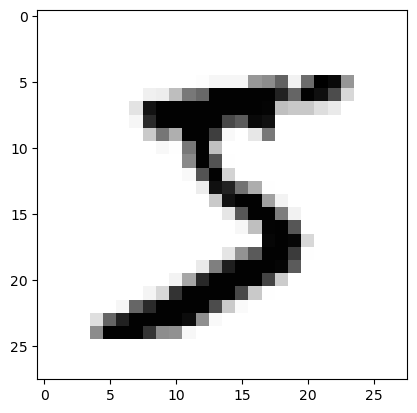

In [7]:
plt.imshow(X_train[0], cmap="Grays")
plt.show()

In [8]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [9]:
pd.DataFrame(X_train[2])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,67,232,39,0,0,0,0,0
6,0,0,0,0,62,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,120,180,39,0,0,0,0,0
7,0,0,0,0,126,163,0,0,0,0,0,0,0,0,0,0,0,0,0,2,153,210,40,0,0,0,0,0
8,0,0,0,0,220,163,0,0,0,0,0,0,0,0,0,0,0,0,0,27,254,162,0,0,0,0,0,0
9,0,0,0,0,222,163,0,0,0,0,0,0,0,0,0,0,0,0,0,183,254,125,0,0,0,0,0,0


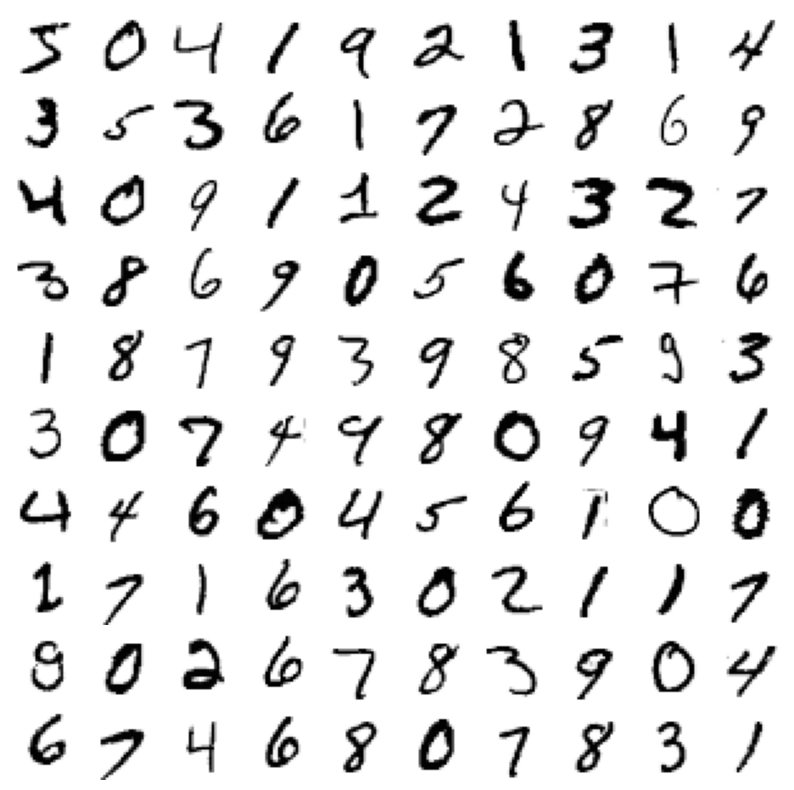

In [10]:
fig, axes = plt.subplots(10, 10, figsize=(10,10))
axes = axes.ravel()

for i in range(100):
    axes[i].imshow(X_train[i], cmap="Grays")
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# 이미지 데이터 훈련을 위한 전처리
* 정규화 = X / 255 => 0\~1 범위로 변환, -1~1범위로 변환
* y 종속변수 = one-hot encoding, to_categorical()

In [12]:
X_train.shape

(60000, 28, 28)

In [17]:
X_train.shape[1]*X_train.shape[2]

IndexError: tuple index out of range

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])

In [18]:
X_train.shape

(60000, 784)

In [19]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])
print(X_test.shape)

(10000, 784)


In [21]:
X_train[:2, :]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 784), dtype=uint8)

# 데이터 정규화 / 255

In [22]:
X_train = X_train / 255
X_test = X_test / 255

# 종속변수 y => one-hot encoding, to_categorical

In [23]:
y_train.shape

(60000,)

In [27]:
# y에 클래스 수 계산
len(np.unique(y_train))

10

In [28]:
# 카테고리 수를 입력해서 one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
y_train.shape

(60000, 10)

In [30]:
y_train[:2, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# DNN 훈련 및 예측
* 이미지 분석시 은닉층 노드: 작은것 -> 큰 것 -> 작은 것

In [31]:
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

I0000 00:00:1764810716.932145     811 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3586 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,457,162 (5.56 MB)

 Trainable params: 1,457,162 (5.56 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2025-12-04 10:17:34.421248: I external/local_xla/xla/service/service.cc:163] XLA service 0x7fca50009750 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-12-04 10:17:34.421294: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-12-04 10:17:34.469186: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-12-04 10:17:34.656304: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91600
2025-12-04 10:17:35.756858: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_205', 12 bytes spill stores, 12 bytes spill loads

2025-12-04 10:17:36.110369: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:3

24/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6627 - loss: 1.1687

I0000 00:00:1764811060.613681    5235 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.8670 - loss: 0.4777 - val_accuracy: 0.9445 - val_loss: 0.1940
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9584 - loss: 0.1409 - val_accuracy: 0.9619 - val_loss: 0.1278
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9744 - loss: 0.0881 - val_accuracy: 0.9689 - val_loss: 0.1054
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9825 - loss: 0.0574 - val_accuracy: 0.9691 - val_loss: 0.1041
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9894 - loss: 0.0369 - val_accuracy: 0.9729 - val_loss: 0.0943
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9920 - loss: 0.0281 - val_accuracy: 0.9726 - val_loss: 0.0980
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9939 - loss: 0.0195 - val_accuracy: 0.9734 - val_loss: 0.1023
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9966 - loss: 0.0133 - val_accuracy: 0.9754 - val_loss

2025-12-04 10:17:47.884915: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_89', 16 bytes spill stores, 16 bytes spill loads

2025-12-04 10:17:48.137706: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_89', 4 bytes spill stores, 4 bytes spill loads



303/313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9733 - loss: 0.0910

2025-12-04 10:17:50.277501: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_89', 4 bytes spill stores, 4 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9763 - loss: 0.0795
test 정확도:  [0.07954813539981842, 0.9763000011444092]


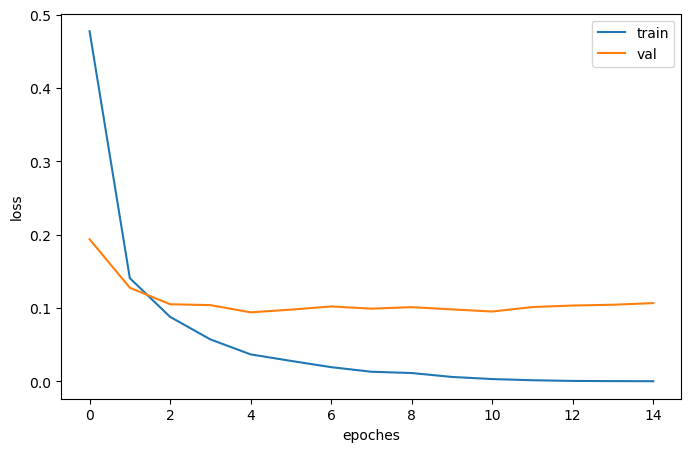

In [33]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model_path = "./model/MNIST_MLP.keras"
chechpoint = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=1000,
                   callbacks=[chechpoint, early_stop])
print("test 정확도: ", model.evaluate(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# CNN 합성곱 신경망으로 이미지 분석하기
* DNN은 이미지 데이터를 1차원으로 펼쳐서 분석
* CNN은 2차원 상태 그대로 분석

In [34]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# CNN을 위한 데이터 전처리 3차원 => 4차원
* (행(전체 데이터 개수), 이미지사이즈(행, 열), 색레이어수(흑백=1, 컬러=3))

In [35]:
X_train.shape

(60000, 28, 28)

In [36]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1).astype('float32') / 255

In [37]:
X_train.shape

(60000, 28, 28, 1)

In [38]:
X_test.shape

(10000, 28, 28, 1)

# y 종속변수 => one-hot encoding, to_categorical(y, class수)

In [42]:
n_class = len(np.unique(y_train))

In [43]:
y_train = to_categorical(y_train, n_class)
y_test = to_categorical(y_test, n_class)

# CNN 합성 네트워크를 위한 layers
* Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [44]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [45]:
model2 = Sequential()
model2.add(Input(shape=(28, 28, 1)))
model2.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model2.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,258 (4.61 MB)

 Trainable params: 1,209,258 (4.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100


2025-12-04 10:37:17.202440: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-04 10:37:17.202528: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-04 10:37:17.968283: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_989', 12 bytes spill stores, 12 bytes spill loads

2025-12-04 10:37:18.669917: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : 

45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.7198 - loss: 0.8832 - val_accuracy: 0.9239 - val_loss: 0.2600
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9252 - loss: 0.2554 - val_accuracy: 0.9625 - val_loss: 0.1285
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9566 - loss: 0.1478 - val_accuracy: 0.9738 - val_loss: 0.0877
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9697 - loss: 0.1044 - val_accuracy: 0.9789 - val_loss: 0.0691
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9768 - loss: 0.0775 - val_accuracy: 0.9803 - val_loss: 0.0653
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9804 - loss: 0.0649 - val_accuracy: 0.9828 - val_loss: 0.0571
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.9839 - loss: 0.0544 - val_accuracy: 0.9841 - val_loss: 0.0531
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9859 - loss: 0.0482 - val_accuracy: 0.9861 - val_

2025-12-04 10:38:08.144978: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-12-04 10:38:08.920897: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_125', 100 bytes spill stores, 100 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9900 - loss: 0.0338
test 정확도:  [0.03384050726890564, 0.9900000095367432]


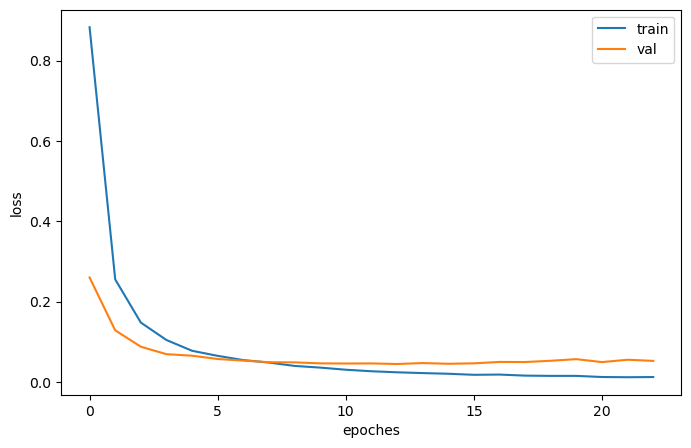

In [46]:
model2.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
model_path = "./model/MNIST_CNN.keras"
chechpoint = ModelCheckpoint(filepath=model_path, save_best_only=True)
early_stop = EarlyStopping(patience=10, restore_best_weights=True)
history2 = model2.fit(X_train, y_train, validation_split=0.25, epochs=100, batch_size=1000,
                   callbacks=[chechpoint, early_stop])
print("test 정확도: ", model2.evaluate(X_test, y_test))
plt.figure(figsize=(8,5))
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel("epoches")
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()